In [1]:
# SUPERVISED MACHINE LEARNING
# REGRESSION - Simple Linear Regression

# Import All Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Stage 1 : Data Gathering
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [3]:
# Stage 2 : EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [4]:
# Stage 3 : Data Preparation
# a.) check for missing values
# b.) check for duplicate records
# c.) convert non-numerical features into numerical features
# d.) normalization
# e.) select independent and dependent variable

In [5]:
# a.) check for missing values
data.isnull().sum()

Hours_Studied    0
Test_Grade       0
Status           0
Result           0
dtype: int64

In [6]:
# b.) check for duplicate records
data.duplicated().sum()

np.int64(0)

In [7]:
# c.) convert non-numerical features into numerical features
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [8]:
data.Status = lb.fit_transform(data.Status)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      int64 
 3   Result         9 non-null      object
dtypes: int64(3), object(1)
memory usage: 420.0+ bytes


In [10]:
# d.) normalization
# For machine learning, every dataset does not require normalization. It is
# required only when features have different ranges.

# The goal of normalization is to change the values of numeric
# columns in the dataset to a common scale.

# when you normalize your data you're not changing its meaning --> you're just changing
# its scale so that the model can learn efficiently

# after normalization features are on comparable scale

# 2000 <---> 0.002036659877800407
# model trains on 0.002 instead of 2000

'''
                       example dataset where features have a different range
  age       income
	18        2000        0.002036659877800407
	19        4500        0.0274949083503055
	20        1800
	21        100000
	22         50000
	23         12000
	24         80000


  min = 1800
	max = 100000
	x   = 2000

	Xnorm = (X-Xmin) / (Xmax - Xmin)

	Xnorm = (2000-1800) / (100000-1800)
	Xnorm = 0.002036659877800407


  Xnorm = (4500-1800) / (100000-1800)
	Xnorm =  0.0274949083503055

'''

# vals = data.Test_Grade.values
# print(vals)

# nrmlz1 = pp.normalize([vals])
# print(nrmlz1)

# nrmlz2 = pp.MinMaxScaler().fit_transform([vals])
# print(nrmlz2)
print()

In [11]:
# e.) select independent and dependent variable

# X --> independent variable
# scikit-learn expects X to be 2D even if you have only one feature

X = data.Hours_Studied.values
X = X.reshape(9,1)
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [12]:
# Y --> dependent variable
Y = data.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [13]:
# Stage 4 : Model Development [Apply A Suitable ML Algo]

import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [14]:
lin_reg.fit(X,Y)

LinearRegression()

In [15]:
import pickle
pickle.dump(lin_reg,open('model.pkl','wb'))

In [16]:
# Stage 5 : Evaluation
data['predicted_values'] = lin_reg.predict(X)

In [17]:
data[['Hours_Studied','Test_Grade','predicted_values']]

,Hours_Studied,Test_Grade,predicted_values
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [18]:
pred_values = lin_reg.predict(X)
pred_values

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

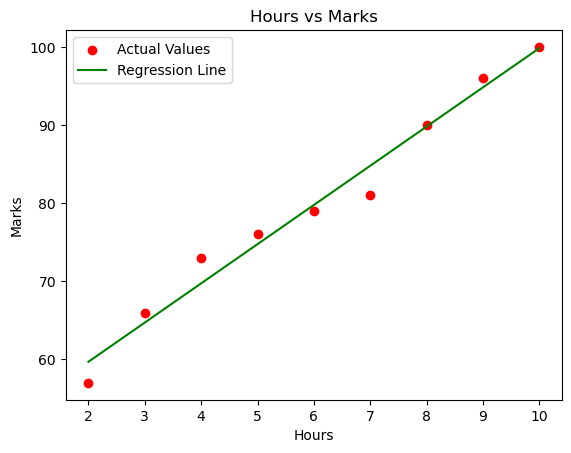

In [19]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot predicted values
plt.plot(X,pred_values,color='green',label='Regression Line')
plt.title('Hours vs Marks')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [20]:
# R-squared
# after fitting the line we want to know how well the line explains the data - that's where R2 comes in
# R2 = 0.97 that means 97% of the variation in Y is explained by the model

from sklearn.metrics import r2_score
accuracy = r2_score(Y,pred_values)
print('Regression Score Function :',accuracy)
print(f'Regression Score Function : {int(accuracy*100)}%')

Regression Score Function : 0.9757431074095347
Regression Score Function : 97%


In [21]:
# Stage 6 : Final Predictions
hrs = float(input('How Many Hours You Studied In A Day : '))
marks = lin_reg.predict([[hrs]])  # adding one more dimension here
print('You Can Score',int(marks[0]),'Marks')

How Many Hours You Studied In A Day :  6.5


You Can Score 82 Marks


In [22]:
hrs = float(input('How Many Hours You Studied In A Day : '))
if hrs>=1 and hrs<=10:
  marks = lin_reg.predict([[hrs]])  # adding one more dimension here
  print('You Can Score',int(marks[0]),'Marks')
else:
  print('Please Enter The Hours Between 1 till 10')

How Many Hours You Studied In A Day :  7.2


You Can Score 85 Marks
